<a href="https://colab.research.google.com/github/ozydziak/uczenie-maszynowe/blob/cwiczenia_z_python/API_detekcja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import fbprophet

np.random.seed(41)
fbprophet.__version__

'0.7.1'

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/traffic.csv', 
                 parse_dates=['timestamp'])
df

,timestamp,count
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917
3,2018-09-25 14:04:00,177.798
4,2018-09-25 14:05:00,165.469
...,...,...
14393,2018-10-05 13:54:00,151.492
14394,2018-10-05 13:55:00,151.724
14395,2018-10-05 13:56:00,153.776
14396,2018-10-05 13:57:00,150.481


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  14398 non-null  datetime64[ns]
 1   count      14398 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 225.1 KB


In [ ]:
px.line(df, x='timestamp', y='count', title='Anomaly Detection - web traffic', width=950, height=500,
        template='plotly_dark', color_discrete_sequence=['#42f5d4'])

In [ ]:
px.scatter(df, x='timestamp', y='count', title='Detekcja anomalii - ruch sieciowy', width=950, height=500,
           template='plotly_dark', color_discrete_sequence=['#d5a6bd'])

In [ ]:
data = df.copy()
data.columns = ['ds', 'y']
data.head(3)

,ds,y
0,2018-09-25 14:01:00,182.478
1,2018-09-25 14:02:00,176.231
2,2018-09-25 14:03:00,183.917


In [ ]:
from fbprophet import Prophet

Prophet?

In [ ]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False, 
                interval_width=0.99, changepoint_range=0.8)

model.fit(data)
forecast = model.predict(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-09-25 14:01:00,111.600106,132.797205,187.334256,111.600106,111.600106,48.864424,48.864424,48.864424,48.864424,48.864424,48.864424,0.0,0.0,0.0,160.464530
1,2018-09-25 14:02:00,111.601392,130.317007,191.563074,111.601392,111.601392,48.929051,48.929051,48.929051,48.929051,48.929051,48.929051,0.0,0.0,0.0,160.530443
2,2018-09-25 14:03:00,111.602678,135.528548,185.754231,111.602678,111.602678,48.990147,48.990147,48.990147,48.990147,48.990147,48.990147,0.0,0.0,0.0,160.592825
3,2018-09-25 14:04:00,111.603964,132.338786,192.261156,111.603964,111.603964,49.047686,49.047686,49.047686,49.047686,49.047686,49.047686,0.0,0.0,0.0,160.651650
4,2018-09-25 14:05:00,111.605250,133.412844,188.048425,111.605250,111.605250,49.101642,49.101642,49.101642,49.101642,49.101642,49.101642,0.0,0.0,0.0,160.706892
5,2018-09-25 14:06:00,111.606536,132.751587,187.335504,111.606536,111.606536,49.151992,49.151992,49.151992,49.151992,49.151992,49.151992,0.0,0.0,0.0,160.758528
6,2018-09-25 14:07:00,111.607822,132.785348,187.709490,111.607822,111.607822,49.198710,49.198710,49.198710,49.198710,49.198710,49.198710,0.0,0.0,0.0,160.806532
7,2018-09-25 14:08:00,111.609108,134.830759,189.182457,111.609108,111.609108,49.241773,49.241773,49.241773,49.241773,49.241773,49.241773,0.0,0.0,0.0,160.850880
8,2018-09-25 14:09:00,111.610394,132.325636,187.842147,111.610394,111.610394,49.281157,49.281157,49.281157,49.281157,49.281157,49.281157,0.0,0.0,0.0,160.891550
9,2018-09-25 14:10:00,111.611679,134.619572,189.691007,111.611679,111.611679,49.316839,49.316839,49.316839,49.316839,49.316839,49.316839,0.0,0.0,0.0,160.928518


In [ ]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,real,anomaly
0,2018-09-25 14:01:00,111.600106,132.797205,187.334256,111.600106,111.600106,48.864424,48.864424,48.864424,48.864424,48.864424,48.864424,0.0,0.0,0.0,160.464530,182.478,1
1,2018-09-25 14:02:00,111.601392,130.317007,191.563074,111.601392,111.601392,48.929051,48.929051,48.929051,48.929051,48.929051,48.929051,0.0,0.0,0.0,160.530443,176.231,1
2,2018-09-25 14:03:00,111.602678,135.528548,185.754231,111.602678,111.602678,48.990147,48.990147,48.990147,48.990147,48.990147,48.990147,0.0,0.0,0.0,160.592825,183.917,1


In [ ]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl', 
           title='Anomaly Detection in Time Series', template='plotly_dark', width=950, height=500)

In [ ]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

,ds
0,2018-09-25 14:01:00
1,2018-09-25 14:02:00
2,2018-09-25 14:03:00
3,2018-09-25 14:04:00
4,2018-09-25 14:05:00
...,...
15833,2018-10-06 13:54:00
15834,2018-10-06 13:55:00
15835,2018-10-06 13:56:00
15836,2018-10-06 13:57:00


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,160.464530,132.005475,187.508861
1,2018-09-25 14:02:00,160.530443,132.580905,186.040238
2,2018-09-25 14:03:00,160.592825,133.721454,188.303464
3,2018-09-25 14:04:00,160.651650,132.025466,192.797461
4,2018-09-25 14:05:00,160.706892,131.985145,188.613172


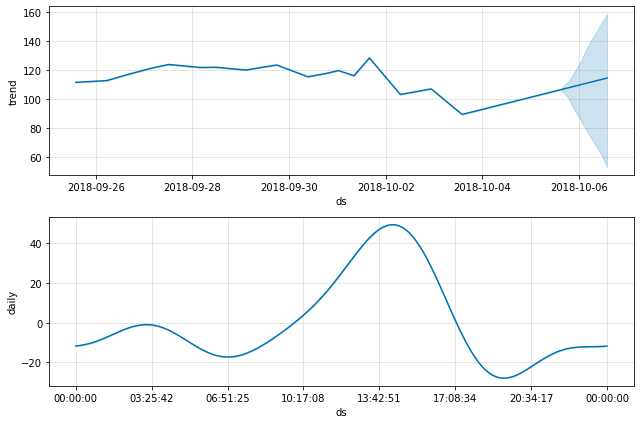

In [ ]:
_ = model.plot_components(forecast)

In [ ]:
data_sep = df[df['timestamp'].dt.month == 9]
data_sep.columns = ['ds', 'y']
data_sep

,ds,y
0,2018-09-25 14:01:00,182.4780
1,2018-09-25 14:02:00,176.2310
2,2018-09-25 14:03:00,183.9170
3,2018-09-25 14:04:00,177.7980
4,2018-09-25 14:05:00,165.4690
...,...,...
7794,2018-09-30 23:55:00,99.5066
7795,2018-09-30 23:56:00,100.4220
7796,2018-09-30 23:57:00,98.1739
7797,2018-09-30 23:58:00,95.8520


In [ ]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False, 
                seasonality_mode='multiplicative', interval_width=0.99, changepoint_range=0.8)

model.fit(data_sep)
forecast = model.predict(data_sep)
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

,ds,trend,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,115.079545,165.368638,134.840936,194.662278
1,2018-09-25 14:02:00,115.063954,165.396413,134.614792,196.840781
2,2018-09-25 14:03:00,115.048362,165.420288,132.878676,193.111461


In [ ]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat,real,anomaly
0,2018-09-25 14:01:00,115.079545,134.840936,194.662278,115.079545,115.079545,0.436994,0.436994,0.436994,0.436994,0.436994,0.436994,0.0,0.0,0.0,165.368638,182.478,1
1,2018-09-25 14:02:00,115.063954,134.614792,196.840781,115.063954,115.063954,0.437430,0.437430,0.437430,0.437430,0.437430,0.437430,0.0,0.0,0.0,165.396413,176.231,1
2,2018-09-25 14:03:00,115.048362,132.878676,193.111461,115.048362,115.048362,0.437833,0.437833,0.437833,0.437833,0.437833,0.437833,0.0,0.0,0.0,165.420288,183.917,1
3,2018-09-25 14:04:00,115.032771,135.594451,199.464976,115.032771,115.032771,0.438201,0.438201,0.438201,0.438201,0.438201,0.438201,0.0,0.0,0.0,165.440238,177.798,1
4,2018-09-25 14:05:00,115.017179,134.737325,199.440368,115.017179,115.017179,0.438535,0.438535,0.438535,0.438535,0.438535,0.438535,0.0,0.0,0.0,165.456244,165.469,1
5,2018-09-25 14:06:00,115.001588,135.105045,195.746150,115.001588,115.001588,0.438835,0.438835,0.438835,0.438835,0.438835,0.438835,0.0,0.0,0.0,165.468283,181.878,1
6,2018-09-25 14:07:00,114.985996,136.254074,196.363445,114.985996,114.985996,0.439100,0.439100,0.439100,0.439100,0.439100,0.439100,0.0,0.0,0.0,165.476335,184.502,1
7,2018-09-25 14:08:00,114.970405,136.776763,196.278214,114.970405,114.970405,0.439330,0.439330,0.439330,0.439330,0.439330,0.439330,0.0,0.0,0.0,165.480379,183.303,1
8,2018-09-25 14:09:00,114.954813,135.518757,194.529531,114.954813,114.954813,0.439526,0.439526,0.439526,0.439526,0.439526,0.439526,0.0,0.0,0.0,165.480397,177.578,1
9,2018-09-25 14:10:00,114.939222,133.719713,195.606494,114.939222,114.939222,0.439686,0.439686,0.439686,0.439686,0.439686,0.439686,0.0,0.0,0.0,165.476370,171.641,1


In [ ]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl', 
           title='Anomaly Detection in Time Series - September', template='plotly_dark', width=950, height=500)

In [ ]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

NameError: ignored

In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-09-25 14:01:00,165.368638,135.846606,197.131147
1,2018-09-25 14:02:00,165.396413,137.980464,196.410195
2,2018-09-25 14:03:00,165.420288,134.299828,191.811360
3,2018-09-25 14:04:00,165.440238,137.552563,193.715188
4,2018-09-25 14:05:00,165.456244,139.668286,197.325591
...,...,...,...,...
10674,2018-10-02 23:55:00,102.616075,31.583198,171.125483
10675,2018-10-02 23:56:00,102.623819,31.264806,183.350036
10676,2018-10-02 23:57:00,102.632407,31.958020,170.720726
10677,2018-10-02 23:58:00,102.641848,30.313781,175.813642


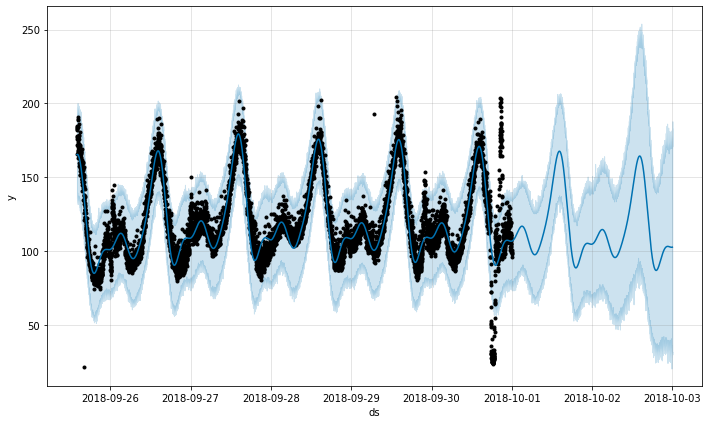

In [ ]:
_ = model.plot(forecast)

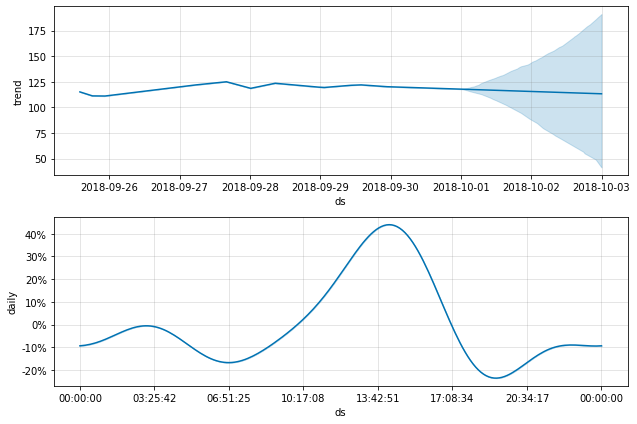

In [ ]:
_ = model.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly
plot_plotly(model, forecast, xlabel='czas', ylabel='ruch webowy')

In [ ]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl', 
           title='Anomaly Detection in Time Series - September', template='plotly_dark', width=950, height=500)